<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/Rorschach_segmentation_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [130]:
from fastai.vision.all import *
import cv2
from google.colab.patches import cv2_imshow

In [131]:
path =  Path('/content/gdrive/MyDrive/study/Symmetry')
img_No = 0

In [132]:
codes = np.loadtxt(path/'codes.txt',dtype=str)
codes

array(['left_part', 'right_part'], dtype='<U10')

In [133]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [134]:
fnames_test = get_image_files(path/'images_test')

Load net

In [135]:
learn_inf = load_learner(path/'export.pkl')

In [136]:
pred_segm = learn_inf.predict(fnames_test[0])

In [137]:
#cv2_imshow(np.array(pred_segm[0])*255)

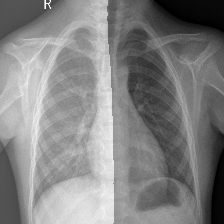

In [138]:
m = np.uint16(cv2.imread(str(fnames_test[img_No]), cv2.IMREAD_GRAYSCALE))
mr = cv2.resize(m,(224,224))
#mask = np.uint16(np.array(pred_segm[2][0,:,:]))*255
mask = np.uint16(np.array(pred_segm[1]))*255
res = cv2.addWeighted(mr,0.7,mask,0.3,0)
cv2_imshow(res)